In [166]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [167]:
import numpy as np
import pandas as pd

In [168]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [169]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect,func

In [170]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [171]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)


In [172]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [173]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [174]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [176]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [177]:
#first_row = session.query(Station).first()
#first_row.__dict__

In [178]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [179]:
engine.execute("SELECT * FROM measurement LIMIT 10").fetchall() 

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [180]:
engine.execute("SELECT * FROM station LIMIT 10").fetchall() 

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [182]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

In [183]:
# Calculate the date 1 year ago from the last data point in the database
# date 1 year ago from most recent_date
one_year_ago = dt.date(2017,8,23)- dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [186]:
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date,Measurement.prcp).\
                            filter(Measurement.date >= one_year_ago).\
                            order_by(Measurement.date).all()

In [187]:
#Load the query results into a Pandas DataFrame and set the index to the date column.
prcp_data_df = pd.DataFrame(prcp_data,columns=['date','prcp'])
prcp_data_df.tail(10)

,date,prcp
2220,2017-08-21,0.02
2221,2017-08-21,NaN
2222,2017-08-21,0.56
2223,2017-08-22,0.00
2224,2017-08-22,0.00
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08
2229,2017-08-23,0.45


In [188]:
# Drop rows with NAN values
prcp_data_df = prcp_data_df.dropna()

In [189]:
prcp_data_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79


In [190]:
prcp_data_df.set_index('date',inplace=True)
prcp_data_df.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


In [191]:
# Sort the dataframe by date in ascending order
#prcp_data_df = prcp_data_df.sort_values(by = 'date')
#prcp_data_df.head(10)


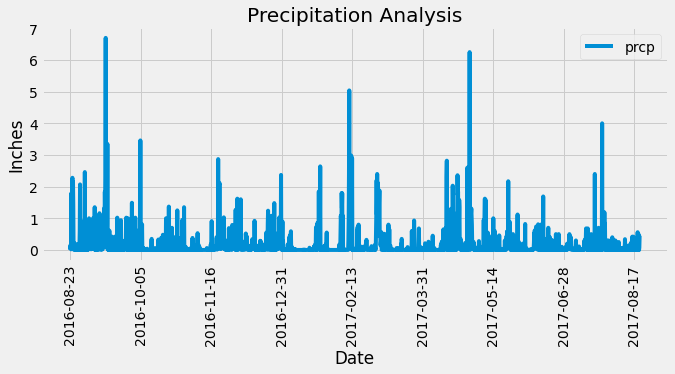

In [192]:
# Use Pandas Plotting with Matplotlib to plot the data

ax = prcp_data_df.plot(figsize=(10,4),rot=90)

ax.set_title('Precipitation Analysis')
ax.set_xlabel('Date')
ax.set_ylabel('Inches')
#plt.tight_layout()
plt.show()

In [193]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_data_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [194]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Measurement.station).distinct().count()
print(f'There are {station_count} stations available in this dataset')

There are 9 stations available in this dataset


In [195]:
session.query(Measurement.station).distinct().all()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [196]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
                                group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [197]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = active_stations[0][0]
most_active

'USC00519281'

In [198]:
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active).all()


[(54.0, 85.0, 71.66378066378067)]

In [199]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.tobs).\
                          filter(Measurement.station == most_active).\
                          filter(Measurement.date >= one_year_ago).\
                          order_by(Measurement.date.desc()).all()
#tobs_data
tobs_df = pd.DataFrame(tobs_data)
tobs_df.head()

,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0


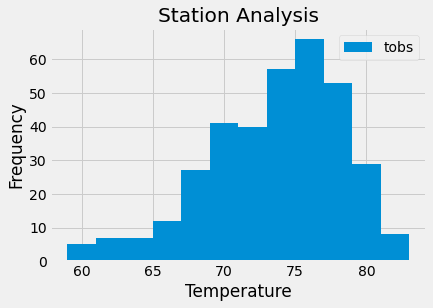

In [200]:
plt.hist(tobs_df['tobs'],bins=12)
plt.title('Station Analysis')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.show()

## Bonus Challenge Assignment

In [201]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [236]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_tobs = calc_temps('2016-09-01','2016-09-15')

In [237]:
trip_df= pd.DataFrame(trip_tobs,columns=['tmin','tavg','tmax'])
trip_df.head()

,tmin,tavg,tmax
0,71.0,77.580645,84.0


In [238]:
yerr=trip_df['tmax'] - trip_df['tmin']
print(yerr)

0    13.0
dtype: float64


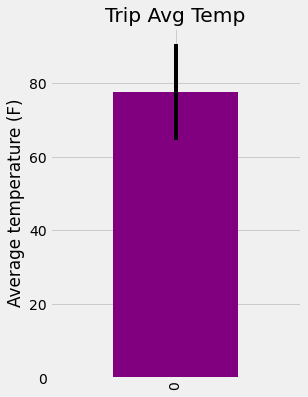

In [243]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
#yerr = trip_df['tmax'] - trip_df['tmin']
x_axis= np.arange(len(trip_df))
trip_df['tavg'].plot(kind ='bar',figsize=(4,6),yerr=trip_df['tmax'] - trip_df['tmin'],color='purple' )

plt.title('Trip Avg Temp')
plt.ylabel('Average temperature (F)')
plt.xticks(x_axis)
#plt.tight_layout()
plt.show()

In [251]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfall_per_ws = session.query(Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation,Measurement.prcp).\
                                filter(Station.station == Measurement.station).\
                                filter(Measurement.date >= '2016-09-01').\
                                filter(Measurement.date <= '2016-09-15').\
                                group_by(Measurement.station).\
                                order_by(Measurement.prcp.desc()).all()
print(rainfall_per_ws)

[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.02), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.01), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, None), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]


In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
